In [35]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [1]:
import torch
import torch.nn as nn

In [19]:
class Sigmoid:
    """Standard Sigmoid function.

    Our forward function is the normal sigmoid()
    Our backward function is the functions' derivative.

    These names are just used to clarify when we use them 
    in our neural network.
    """
    def forward(self, s):
        return 1 / (1 + torch.exp(-s))

    def backward(self, s):
        """Derivative of the Sigmoid function."""
        return s * (1 - s)


class MultiLayerPerceptron(nn.Module):

    def __init__(self, input_size, hidden_size, num_classes):
        super(MultiLayerPerceptron, self).__init__()

        # Weights
        self.W1 = nn.Parameter(torch.randn(input_size, hidden_size))
        self.W2 = nn.Parameter(torch.randn(hidden_size, num_classes))
        # Activation function
        self.sigmoid = Sigmoid()

    def forward(self, x):
        self.z = torch.matmul(x, self.W1)
        self.z2 = self.sigmoid.forward(self.z)
        self.z3 = torch.matmul(self.z2, self.W2)
        out = self.sigmoid.forward(self.z3)
        return out

In [20]:
# Use for replicability.
torch.manual_seed(42)

# Training data for XOR.
x = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float)
y = torch.tensor([[0], [1], [1], [0]], dtype=torch.float)

In [26]:
def total_params(model):
    n=0
    for p in model.parameters():
        np = p.numel()
        n += np
    return n

def set_params(model, theta):
    """Set parameters of the model"""
    n=0
    for p in model.parameters():
        np = p.numel()
        p.data[...] = theta[n:n+np].view(*p.size())
        n += np

model = MultiLayerPerceptron(2,3,1)
Np = total_params(model)
Np
theta = torch.randn((Np,))
set_params(model, theta)

print(theta)
for p in model.parameters():
    print(p.data)

tensor([-0.9058, -0.2607, -0.5465,  2.1174, -1.7118,  0.1651,  1.5819,  0.4485,
         0.0330])
tensor([[-0.9058, -0.2607, -0.5465],
        [ 2.1174, -1.7118,  0.1651]])
tensor([[1.5819],
        [0.4485],
        [0.0330]])


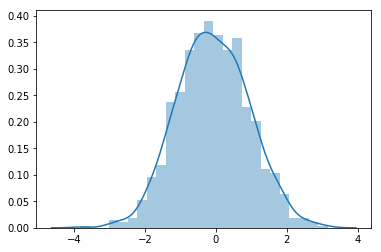

In [36]:
class Normal:
    def __init__(self, mu, sigma):
        self.mu = mu
        self.sigma = sigma
    def sample(self, N):
        return torch.randn(N)*self.sigma + self.mu
    def log_density(self, x):
        "unnormalized log density"
        return - (x-self.mu)**2/(2*self.sigma)

prior = Normal(0,1)
prior.log_density(1)
import seaborn as sns
sns.distplot(prior.sample(1000))

In [37]:
def log_likelihood(model, x, y):
    """Take the log likelihood of the theta with respect data"""
    out = model(x)
    return nn.functional.mse_loss(out,y)

In [38]:
log_likelihood(model, x, y)

tensor(0.3267, grad_fn=<MseLossBackward>)

In [43]:
class MetropolisSampler:
    def __init__(self, model):
        pass
    def chain(self, N):
        pass

def metropolis(theta0, n_mc, sigma_proposal, model, x, y):
    chain = []
    chain.append(theta0)
    
    proposal = Normal(theta0, sigma_proposal)
    theta_current = theta0
    
    for i in range(n_mc):
        theta_proposed = proposal.sample(1)
        
        proposal.mu = theta_proposed
        log_rate = log_posterior(theta_proposed, model, x, y)+proposal.log_density(theta_current)
        
        proposal.mu = theta_current
        log_rate = log_rate-log_posterior(theta_current)-proposal.log_density(theta_proposed)
        
        u = torch.rand()
        
        if log(u) < log_rate:
            theta_current = theta_proposed
            
        chain.append(theta_current)
        
    return chain

In [44]:
def log_posterior(theta, model, x, y):
    set_params(model, theta)
    log_likelihood(model, x, y)+prior.log_density(theta)

In [45]:
metropolis()

NameError: name 'l' is not defined